In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from epg import *
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 4


In [2]:
TE = 4.048e-3
angles = np.loadtxt('/Users/jtamir/scan-data/feet/synth_foot/sim_for_paper/flipmod/flipangles.txt.408183520')
angles_rad = angles * np.pi / 180.
T = len(angles_rad)

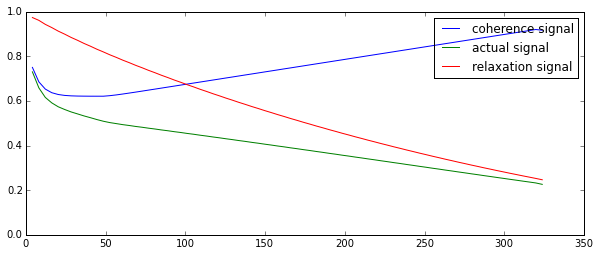

In [3]:
T1 = 1000e-3
T2 = 150e-3

S_coherence = np.real(FSE_signal(angles_rad, TE, 1000, 1000))
S_act = np.real(FSE_signal(angles_rad, TE, T1, T2))

S_relax = S_act / S_coherence

echo_times = (1 + np.arange(T)) * TE

plt.plot(echo_times*1000, S_coherence, echo_times*1000, S_act, echo_times*1000, S_relax)
plt.ylim((0,1))
plt.legend(('coherence signal', 'actual signal', 'relaxation signal'));

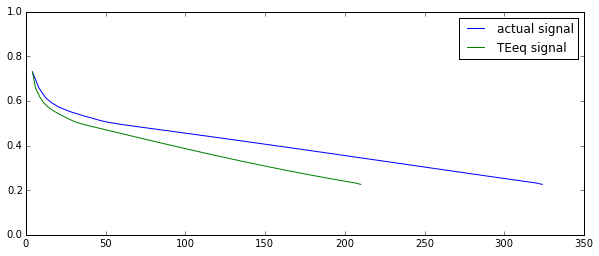

In [4]:
echo_times_eq = -T2 * np.log(S_act / S_coherence)
plt.plot(echo_times*1000, S_act, echo_times_eq*1000, S_act)
plt.ylim((0,1))
plt.legend(('actual signal', 'TEeq signal'));

In [56]:
echo_times_eq[41]*1000

array([ 100.18454482])